## Data Exploration 2
This is an assignment for my thinkful data science course - "Data Exploration 2"
Raj Prasad
May 2019


[html version](https://daddyprasad5.github.io/Data_Exploration_2.html) - with all the code hidden away for a quick read

[jupyter notebook version](https://github.com/daddyprasad5/thinkful/blob/master/Data_Exploration_2.ipynb) - with all the code exposed in an interactive notebook

In [11]:
#imports
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

%matplotlib inline
sns.set_style()

In [4]:
#load data
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

In [6]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 1. Are there any differences between the genders, ethnicities and parental level of education with respect to their performances in exams?

yep, lots of significant differences.  See list below. 

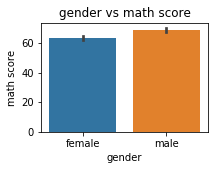

t-test between groups female and male is significant:  p = 9.120185549328822e-08:


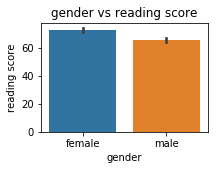

t-test between groups female and male is significant:  p = 4.680538743933289e-15:


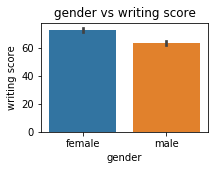

t-test between groups female and male is significant:  p = 2.019877706867934e-22:


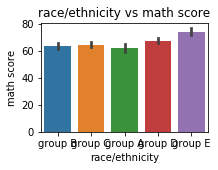

t-test between groups group B and group D is significant:  p = 0.004886197137104194:
t-test between groups group B and group E is significant:  p = 5.007946047497971e-09:
t-test between groups group C and group D is significant:  p = 0.015888349556016285:
t-test between groups group C and group E is significant:  p = 1.927238849552764e-09:
t-test between groups group A and group D is significant:  p = 0.0009068636053543751:
t-test between groups group A and group E is significant:  p = 1.083559122656415e-08:
t-test between groups group D and group E is significant:  p = 2.3187640326715042e-05:


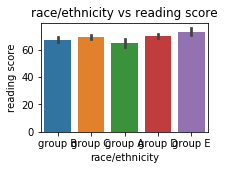

t-test between groups group B and group E is significant:  p = 0.0007951618495240944:
t-test between groups group C and group A is significant:  p = 0.010364398025471079:
t-test between groups group C and group E is significant:  p = 0.0069132842804986595:
t-test between groups group A and group D is significant:  p = 0.002488654464332207:
t-test between groups group A and group E is significant:  p = 6.463395931833847e-05:
t-test between groups group D and group E is significant:  p = 0.045033306431345586:


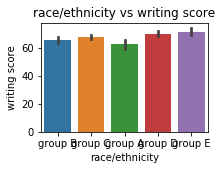

t-test between groups group B and group D is significant:  p = 0.0014749978881319053:
t-test between groups group B and group E is significant:  p = 0.0008032300486353951:
t-test between groups group C and group A is significant:  p = 0.004610690740740428:
t-test between groups group C and group E is significant:  p = 0.019183539018898285:
t-test between groups group A and group D is significant:  p = 4.084805733969806e-05:
t-test between groups group A and group E is significant:  p = 3.483278064499439e-05:


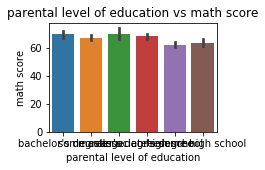

t-test between groups bachelor's degree and high school is significant:  p = 2.9965345853843376e-05:
t-test between groups bachelor's degree and some high school is significant:  p = 0.0015409192922812146:
t-test between groups some college and high school is significant:  p = 0.00043498004192453146:
t-test between groups some college and some high school is significant:  p = 0.016324361572645503:
t-test between groups master's degree and high school is significant:  p = 0.000570929230228812:
t-test between groups master's degree and some high school is significant:  p = 0.008736228790471057:
t-test between groups associate's degree and high school is significant:  p = 9.247314274963044e-05:
t-test between groups associate's degree and some high school is significant:  p = 0.005041081492906143:


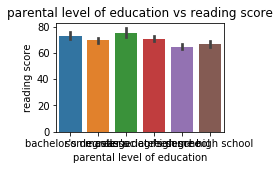

t-test between groups bachelor's degree and some college is significant:  p = 0.028127555314401052:
t-test between groups bachelor's degree and high school is significant:  p = 8.804250310784477e-07:
t-test between groups bachelor's degree and some high school is significant:  p = 0.0007561971719730451:
t-test between groups some college and master's degree is significant:  p = 0.004165440800640354:
t-test between groups some college and high school is significant:  p = 0.0006001048481252139:
t-test between groups master's degree and associate's degree is significant:  p = 0.02926414570972208:
t-test between groups master's degree and high school is significant:  p = 6.257558119816884e-07:
t-test between groups master's degree and some high school is significant:  p = 0.00024334552617191513:
t-test between groups associate's degree and high school is significant:  p = 7.442167797135797e-06:
t-test between groups associate's degree and some high school is significant:  p = 0.00684677011

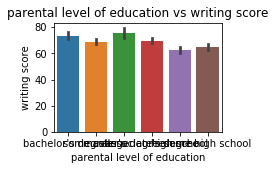

t-test between groups bachelor's degree and some college is significant:  p = 0.00771101202367254:
t-test between groups bachelor's degree and associate's degree is significant:  p = 0.03508162451719667:
t-test between groups bachelor's degree and high school is significant:  p = 2.4076253789515874e-10:
t-test between groups bachelor's degree and some high school is significant:  p = 4.628198526834338e-06:
t-test between groups some college and master's degree is significant:  p = 0.0016985933135959495:
t-test between groups some college and high school is significant:  p = 9.275017802620877e-06:
t-test between groups some college and some high school is significant:  p = 0.010358529086081357:
t-test between groups master's degree and associate's degree is significant:  p = 0.00578403270525775:
t-test between groups master's degree and high school is significant:  p = 9.326930296880332e-10:
t-test between groups master's degree and some high school is significant:  p = 4.27546515307463

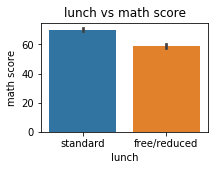

t-test between groups standard and free/reduced is significant:  p = 2.4131955993137074e-30:


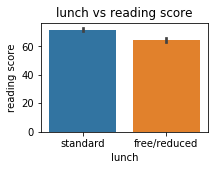

t-test between groups standard and free/reduced is significant:  p = 2.0027966545279011e-13:


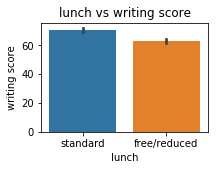

t-test between groups standard and free/reduced is significant:  p = 3.186189583166477e-15:


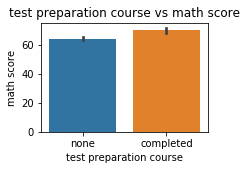

t-test between groups none and completed is significant:  p = 1.5359134607147415e-08:


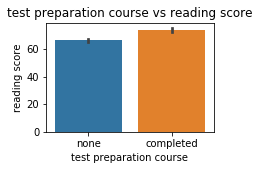

t-test between groups none and completed is significant:  p = 9.081783336892205e-15:


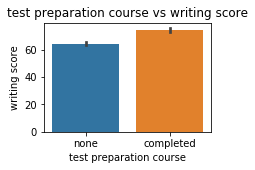

t-test between groups none and completed is significant:  p = 3.68529173524572e-24:


In [28]:
#3X3 categorical to continuouse comparisons

def cat_to_cont(df, cat, cont, threshold):
    """creates a barplot and conducts t-test 
    for a categorical to continuous relationship"""

    #group by
    unique_vals = df[cat].unique()
    grouped_df = df[[cat, cont]].groupby(cat).mean()

    #barplot
    plt.figure(figsize=(3, 2))
    sns.barplot(df[cat], df[cont])
    plt.title("{} vs {}".format(cat, cont))
    plt.show()

    #t-test
    for i in range(0, len(unique_vals)):
        for j in range(i+1, len(unique_vals)):
            t, p = stats.ttest_ind(
                df[df[cat]==unique_vals[i]][cont], 
                df[df[cat]==unique_vals[j]][cont])
            if p < threshold: 
                print("t-test between groups {0} and {1} is significant:  p = {2}:"
                      .format(unique_vals[i], unique_vals[j], p))

cats = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
conts = ["math score", "reading score", "writing score"]

for cat in cats: 
    for cont in conts: 
        cat_to_cont(student_df, cat, cont, 0.05)

### 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

yes (see above bar plots and t-tests).  free reduced performs significantly worse on all 3 tests.  Free/reduced lunch is likely something qualified for by having a low family income.  Low family income likely correlates highly with many factors that might disadvantage students, such as less parental time for homework support, less parent education, and perhaps the student's time available for study.   

### 3. Does the test preparation course seem to have an effect on the exam performances?

yes (see above bar plots and t-tests).

### 4. Which two exam scores are correlated the most with each other?
writing and reading score

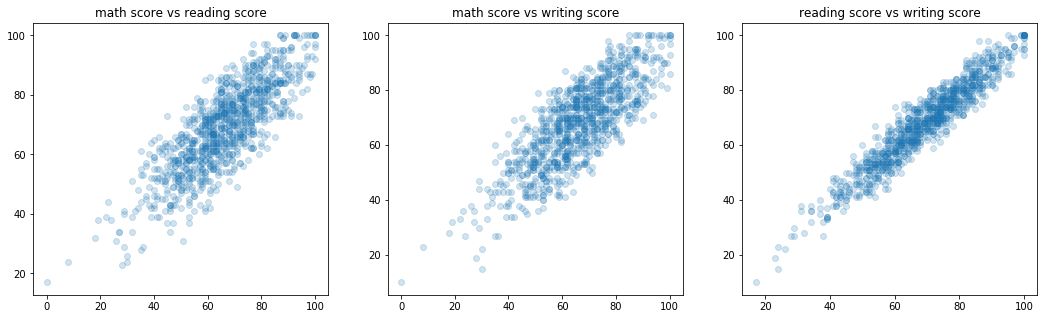

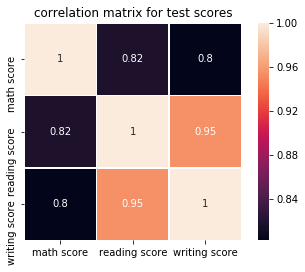

In [48]:
#continuous to continous 
#(the work is already done in the lesson.  making a function for practice)

# conts = ["math score", "reading score", "writing score"]
# df = student_df
# title = "correlation matrix for test scores"

def cont_to_cont(conts, df, title):
    """
    plots scatters and correlation matrix heat map for the list of 
    continuous variables in the dataframe.  
    title arg is the title for the heatmap
    """
    plt.figure(figsize=(18,5))
    axes_cnt = len(conts)
    axes_num = 1
    for i in range(0, len(conts)):
        for j in range(i+1, len(conts)):
            #scatter plot
            plt.subplot(1, axes_cnt, axes_num)
            plt.scatter(df[conts[i]], student_df[conts[j]], alpha=.2)
            plt.title("{0} vs {1}".format(conts[i], conts[j]))
            axes_num += 1

    plt.show()

    #correlation coefficients
    corr_coeffs = df[conts].corr()

    sns.heatmap(corr_coeffs, square=True, annot=True, linewidths=.5)
    plt.title(title)

cont_to_cont(["math score", "reading score", "writing score"], student_df, 
            "correlation matrix for test scores")